In [1]:
import helper_functions as hp
import pandas as pd
import bus_bounds_data as bb_data

In [2]:
generated_data = "../../case118_data4.csv"
X_train, X_test, y_train, y_test, df, slack_bus_data, scaler = hp.pre_process_data_from_file(file_path=generated_data)

Epoch 1/200


2022-08-04 10:27:13.009662: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2188/2188 [==============================] - 7s 3ms/step - loss: 0.0014 - val_loss: 5.5699e-04
Epoch 2/200
2188/2188 [==============================] - 6s 3ms/step - loss: 4.6603e-04 - val_loss: 2.7930e-04
Epoch 3/200
2188/2188 [==============================] - 6s 3ms/step - loss: 2.7927e-04 - val_loss: 2.5179e-04
Epoch 4/200
2188/2188 [==============================] - 6s 3ms/step - loss: 2.1932e-04 - val_loss: 1.7813e-04
Epoch 5/200
2188/2188 [==============================] - 6s 3ms/step - loss: 1.9015e-04 - val_loss: 1.6399e-04
Epoch 6/200
2188/2188 [==============================] - 6s 3ms/step - loss: 1.7596e-04 - val_loss: 1.5169e-04
Epoch 7/200
2188/2188 [==============================] - 6s 3ms/step - loss: 1.6496e-04 - val_loss: 1.6710e-04
Epoch 8/200
2188/2188 [==============================] - 6s 3ms/step - loss: 1.6147e-04 - val_loss: 2.0976e-04
Epoch 9/200
2188/2188 [==============================] - 6s 3ms/step - loss: 1.5637e-04 - val_loss: 1.8050e-04
Epoch 10/200
2188

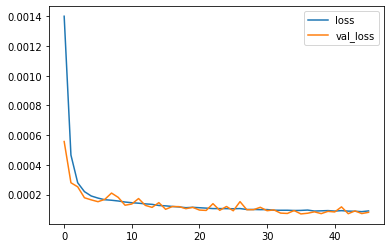

In [3]:
model = hp.train_model(X_train, X_test, y_train, y_test, plot_losses=True)

In [4]:
y_pred = model.predict(X_test)
label_cols = hp.get_label_cols()
y_test_df = pd.DataFrame(data=y_test, columns=label_cols)
y_pred_df = pd.DataFrame(data=y_pred, columns=label_cols)

938/938 [==============================] - 1s 1ms/step


In [5]:
X_train, X_test = hp.unscale_data(X_train, X_test, scaler)

In [6]:
v_min = 0.94
v_max = 1.06
for col, p_bounds_key in zip(label_cols[::2], bb_data.p_bounds.keys()):
    p_min = bb_data.p_bounds[p_bounds_key]['p_min']
    p_max = bb_data.p_bounds[p_bounds_key]['p_max']
    y_test_df[col] = y_test_df[col].apply(lambda x : hp.unparametrize_func(x, p_min, p_max))
    y_pred_df[col] = y_pred_df[col].apply(lambda x : hp.unparametrize_func(x, p_min, p_max))

for col in label_cols[1::2]:
    y_test_df[col] = y_test_df[col].apply(lambda x : hp.unparametrize_func(x, v_min, v_max))
    y_pred_df[col] = y_pred_df[col].apply(lambda x : hp.unparametrize_func(x, v_min, v_max))

In [7]:
hp.evaluate_model(y_test_df, y_pred_df)

Results of Active Power Generation:
MAE : 0.09759899097052781
MSE : 0.03529371058911351
RMSE : 0.18786620395673487

Results of Voltage Generation:
MAE : 6.9580882091607e-05
MSE : 2.2871698013801343e-06
RMSE : 0.0015123391819893228


In [ ]:
# MODEL #6 RESULTS

# Results of Active Power Generation:
# MAE : 0.09759899097052781
# MSE : 0.03529371058911351
# RMSE : 0.18786620395673487

# Results of Voltage Generation:
# MAE : 6.9580882091607e-05
# MSE : 2.2871698013801343e-06
# RMSE : 0.0015123391819893228

In [9]:
# model.save("../../saved_models/acopf_model7.h5")